Training Mean Squared Error: 1.007536295109369
Training R² Score: 0.7645051774663391
Testing Mean Squared Error: 1.0206953660861036
Testing R² Score: 0.7891616188563281


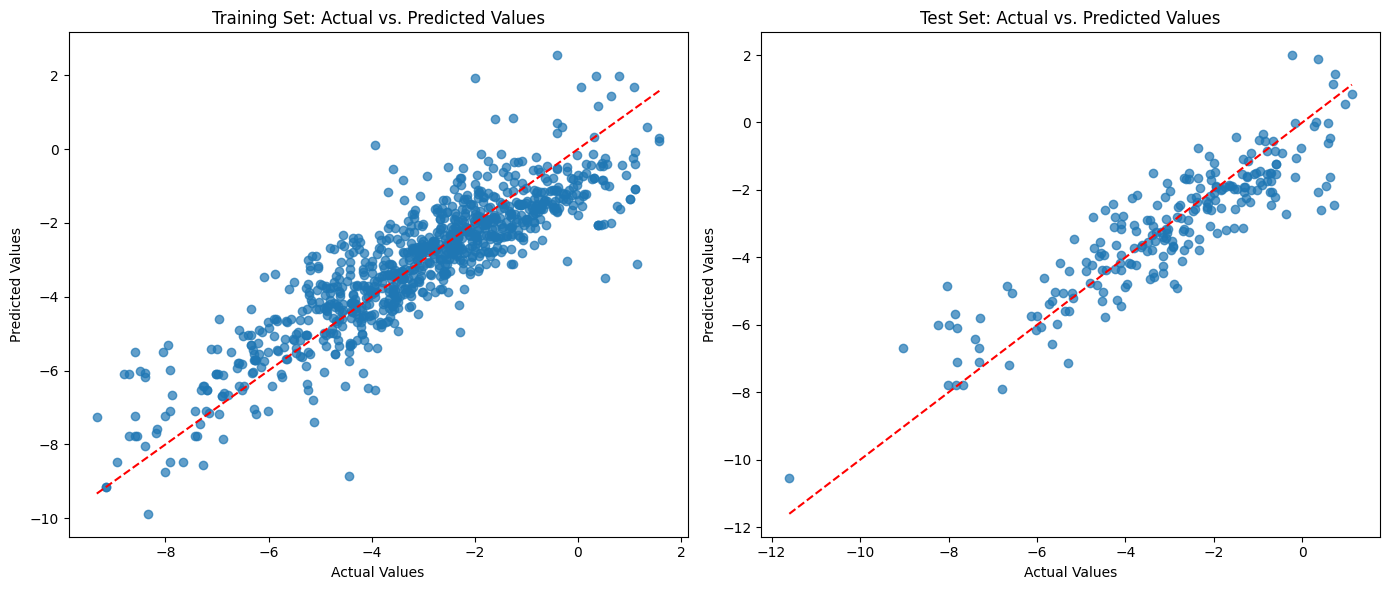

In [19]:
import pandas as pd

#import dataset
#we want to predict logS based on the 4 variables
dataset = pd.read_csv("delaney_solubility_with_descriptors.csv")

#data separation as X and Y
X=dataset.drop("logS", axis=1)
y=dataset["logS"]

# Train/test split
#random_state=100 ensures reproducibility of the split.
#we usually use 80% for training set and 20% for testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state=100)  

#Train the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model on the training set
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {mse_train}')
print(f'Training R² Score: {r2_train}')

# Step 6: Evaluate the model on the testing set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Testing Mean Squared Error: {mse_test}')
print(f'Testing R² Score: {r2_test}')

'''
Overall Interpretation
Model Performance: The model has an R² score of around 0.76 on the training set and 0.79 on the test set, which indicates that it explains a substantial portion of the variance in the target variable. The MSE values are also quite similar for both sets, suggesting that the model is not overfitting (where the training MSE would be much lower than the test MSE) or underfitting (where both MSE values would be high and R² scores low).

Generalization: The close values of training and testing MSE and R² scores indicate that the model generalizes well to unseen data. This balance is what we typically aim for in a well-fitted model.
'''

# Scatter plot for training set

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Training Set: Actual vs. Predicted Values")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')

# Scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Set: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.tight_layout()
plt.show()